<a href="https://colab.research.google.com/github/shrushridh/TASk-7---Assignment-10/blob/main/SVM_Assignment14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Social_Network_Ads.csv

**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay, accuracy_score
import itertools
import seaborn as sn

**Importing the dataset**

In [2]:
data=pd.read_csv("Social_Network_Ads.csv")
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.shape

(400, 5)

In [4]:
data.info

<bound method DataFrame.info of       User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]>

In [5]:
data["Purchased"].unique()

array([0, 1])

In [6]:
data["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
label_encode=preprocessing.LabelEncoder()

data["Gender"]=label_encode.fit_transform(data["Gender"])

In [8]:
data['Gender'].unique()

array([1, 0])

**Splitting the dataset into the Training set and Test set**

In [11]:
x=data[["Gender","Age","EstimatedSalary"]].values
y=data["Purchased"].values

In [12]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.25, random_state=0)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (300, 3) (300,)
Test set: (100, 3) (100,)


**Feature Scaling**

In [13]:
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

**Fitting SVM to the Training set**

In [14]:
model=SVC()
model.fit(x_train,y_train)

SVC()

**Predicting the Test set results**

In [16]:
y_pred=model.predict(x_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score :  0.93


In [17]:
model=SVC(kernel='rbf')
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print("Accuracy Score : ",metrics.accuracy_score(y_test,y_pred))

Accuracy Score :  0.93


**Making the Confusion Matrix**

In [18]:
y_pred = model.predict(x_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,64,4,68
1,3,29,32
All,67,33,100


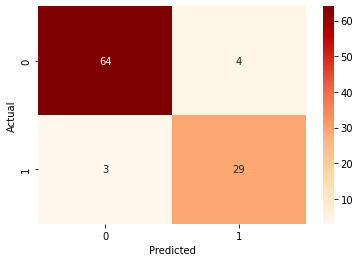

In [23]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True,fmt='d',cmap="OrRd")

In [20]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        68
           1       0.88      0.91      0.89        32

    accuracy                           0.93       100
   macro avg       0.92      0.92      0.92       100
weighted avg       0.93      0.93      0.93       100



**Visualising the Training set results**

In [ ]:
training_score = model.score(x_train,y_train)*100
print("Train data score is :",training_score)

In [ ]:
RocCurveDisplay.from_estimator(model,x_train,y_train)

**Visualising the Test set results**

In [ ]:
test_score=accuracy_score(y_test,y_pred)*100
print("Test data score is :",test_score)

In [ ]:
RocCurveDisplay.from_estimator(model,x_test,y_test)